In [1]:
import warnings as _wrn
import numpy as _nmp
import numpy.random as _rnd
import matplotlib.pyplot as _plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

_wrn.filterwarnings('always')
_plt.style.use('ggplot')

In [3]:
import eQTLseq as _assoc

/Users/dimitris/VEnvs/py34/lib/python3.4/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/dimitris/VEnvs/py34/lib/python3.4/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


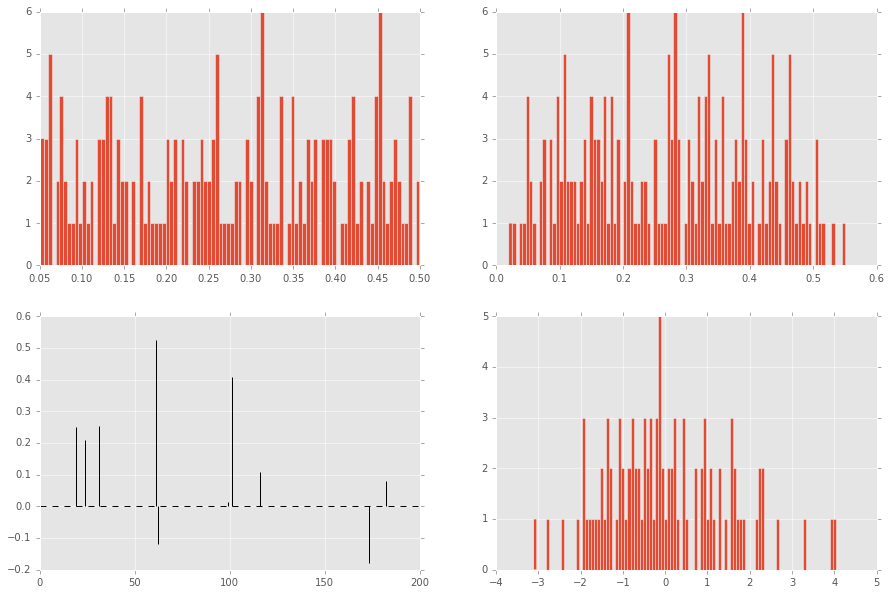

In [4]:
def fcn(n_samples, n_markers, n_markers_causal):
    data_geno = _assoc.simulate_genotypes(n_samples=n_samples, n_markers=n_markers, MAF_range=[0.05, 0.5]) 
    data_pheno = _assoc.simulate_phenotypes(data_geno['G'], kind='Trait', mdl = 'Normal', n_markers_causal = n_markers_causal)

    _plt.figure(figsize = (15,10))
    _plt.subplot(2,2,1); _plt.hist(data_geno['MAF'], 100);
    _plt.subplot(2,2,2); _plt.hist(data_geno['G'].sum(0) / (2 * data_geno['G'].shape[0]), 100);
    _plt.subplot(2,2,3); _plt.vlines(range(data_pheno['coefs'].size), 0, data_pheno['coefs']); _plt.axhline(linestyle='--', color='k')
    _plt.subplot(2,2,4); _plt.hist(data_pheno['Y'], 100);
    
    return data_geno, data_pheno

##
data_geno, data_pheno = fcn(n_samples = 100, n_markers = 200, n_markers_causal = 10)

In [5]:
res = _assoc.bvs_gibbs(data_pheno['Y'], data_geno['G'], n_iters = 4000)

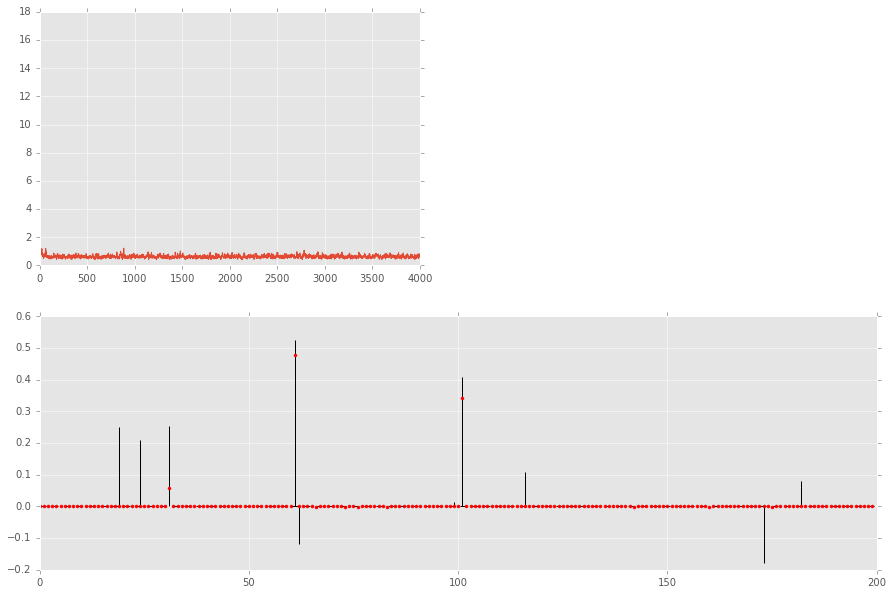

In [6]:
_plt.figure(figsize = (15, 10))

_plt.subplot(2,2,1); _plt.plot(res['s2']);
# _plt.subplot(2,2,2); _plt.plot(_nmp.mean(res['s2_beta'], 1));

_plt.subplot(2,1,2); 
_plt.vlines(range(data_pheno['coefs'].size), 0, data_pheno['coefs']); 
_plt.axhline(linestyle='--', color='k');
_plt.plot(_nmp.mean(res['beta'][-100:-1, :], 0), 'r.'); 